In [9]:
import os
import cv2
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

In [4]:
def initialize_background(frames):
    median_background = np.median(frames, axis=0).astype(np.uint8)
    return median_background

In [5]:
def threshold_difference(diff, threshold):
    return np.where(diff > threshold, diff, 0)

In [6]:
def remove_small_regions(diff, min_size):
    labeled_regions, num_labels = ndimage.label(diff)
    region_sizes = np.bincount(labeled_regions.ravel())
    valid_sizes = region_sizes > min_size
    valid_regions = valid_sizes[labeled_regions]
    filtered_diff = np.where(valid_regions > 0, diff, 0)
    return filtered_diff

In [7]:
def background_maintenance(frames, threshold, min_region_size):
    background = initialize_background(frames[:-1])
    for frame_idx in range(len(frames) - 1):
        current_frame = frames[frame_idx]
        diff = cv2.absdiff(current_frame, background)
        
        thresholded_diff = threshold_difference(diff, threshold)
        filtered_diff = remove_small_regions(thresholded_diff, min_region_size)
        
        updated_background = np.where(filtered_diff == 0, background, current_frame)
        background = updated_background
    
    return background

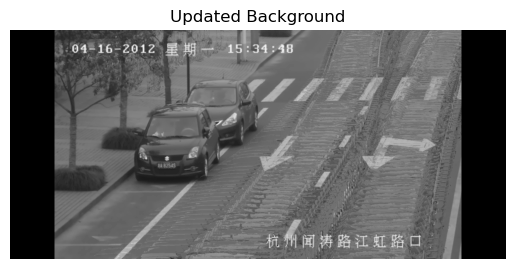

In [11]:
# Directory containing frames
frames_dir = r'C:\Users\bashe\Frame2'

# Load frames from the directory
frame_files = sorted([f for f in os.listdir(frames_dir) if f.endswith('.jpg')])
frames = [cv2.imread(os.path.join(frames_dir, f)) for f in frame_files]

# Convert frames to grayscale
frames_gray = [cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) for frame in frames]

# Set parameters
threshold_value = 30
min_region_size_value = 100

# Apply background maintenance algorithm
updated_background = background_maintenance(frames_gray, threshold_value, min_region_size_value)

# Plot the updated background image using matplotlib
plt.imshow(updated_background, cmap='gray')
plt.title('Updated Background')
plt.axis('off')  # Turn off axis
plt.show()


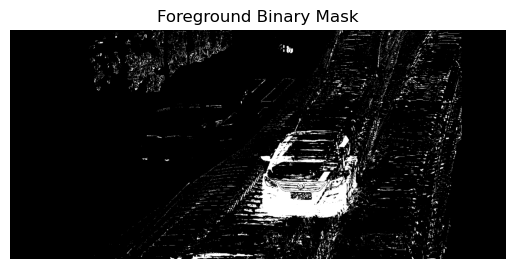

In [12]:
# Load the background and K+1 frame images
k_plus_1_frame = cv2.imread(r"C:\Users\bashe\Frame2\frame_0608.jpg", cv2.IMREAD_GRAYSCALE)

# Set a threshold value
threshold_value = 30

# Calculate the absolute difference between K+1 frame and background
frame_difference = cv2.absdiff(k_plus_1_frame, updated_background)

# Create a binary mask using the threshold
foreground_mask = np.where(frame_difference > threshold_value, 255, 0).astype(np.uint8)

# Display the foreground binary mask using matplotlib
plt.imshow(foreground_mask, cmap='gray')
plt.title('Foreground Binary Mask')
plt.axis('off')
plt.show()